# Blatt 4

## Aufgabe 3 Diskrete Fouriertransformation
Mit Hilfe der diskreten Fouriertransformation wollen wir die Fouriertransformierte einer
ged¨ampften Schwingung untersuchen.

In [62]:
import numpy as np
import matplotlib.pyplot as plt

In [63]:
def mapcolors(n):
    """Return a list of n colors from the default colormap"""
    return [plt.cm.jet(int(x*plt.cm.jet.N/n)) for x in range(n)]

### a) Berechne und Plotte die diskrete Fouriertransformation einer konstanten Funktion
und einer ”δ-Funktion” fur unterschiedliche Anzahl von Samplepunkten ( ¨ numpy.fft.fft()).
Interpretiere die Ergebnisse.

/home/emil/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


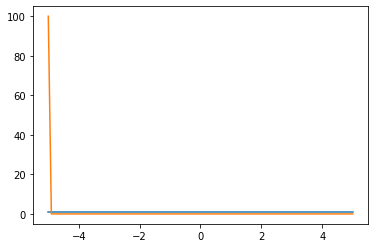

In [64]:
x = np.linspace(-5,5,100)
def f(x,y0=0):
    return np.zeros(len(x))+y0

#constant function
plt.plot(x,f(x,1))
plt.plot(x,np.fft.fft(f(x,1)))
# plot macht wenig sinn

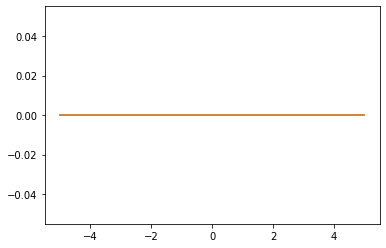

In [65]:
# TODO Delta function
def f(x,x0=0):
    return np.where(x==x0,1,0)
plt.plot(x,f(x,1))
plt.plot(x,np.fft.fft(f(x,1)))

### b) Berechne die diskrete Fouriertransformation einer abfallenden Exponentialfunktion
f(t) = e−αt zuerst fur ¨ α = 1 und t = [0, 50] und Plotte Real- und Imagin¨arteil.
Der Realteil beschreibt die Absorption und der Imagin¨arteil die Phasenverschiebung bei
Wechselwirkung von elektromagnetischer Strahlung mit einem Atom. Sind die Ergebnisse
plausibel? Plotte dazu zum Vergleich die (theoretisch erwartete) Lorentzfunktion.

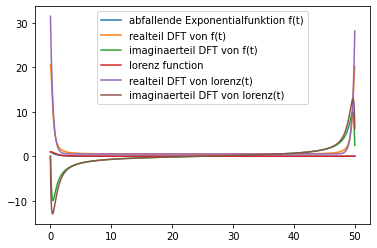

In [66]:
t = np.linspace(0,50,1000)
def f(t,alpha=1):
    return np.exp(-alpha*t)
#plot real and imaginary part
plt.plot(t,f(t),label='abfallende Exponentialfunktion f(t)')

plt.plot(t,np.real(np.fft.fft(f(t))),label='realteil DFT von f(t)')
plt.plot(t,np.imag(np.fft.fft(f(t))),label='imaginaerteil DFT von f(t)')

# plot lorenz function
def lorenz(t):
    return 1/(1+t**2)
plt.plot(t,lorenz(t),label='lorenz function')

plt.plot(t,np.real(np.fft.fft(lorenz(t))),label='realteil DFT von lorenz(t)')
plt.plot(t,np.imag(np.fft.fft(lorenz(t))),label='imaginaerteil DFT von lorenz(t)')
plt.legend()

### c) Welchen Einfluß hat die Zerfallskonstante α auf die Fouriertransformierte in b)? 
Was kann man also uber die Lebensdauer eines Zustandes anhand der Linienbreite des ¨
Spektrums aussagen?

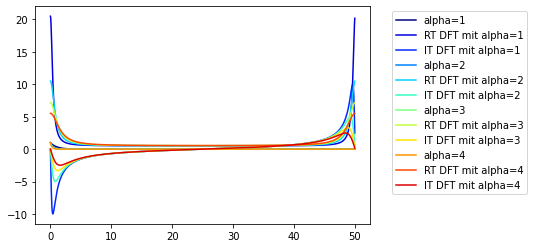

In [67]:
for i in range(1,5):
    plt.plot(t,f(t,i),label=f'alpha={i}',c=mapcolors(3*4)[3*i-3])
    plt.plot(t,np.real(np.fft.fft(f(t,i))),label=f'RT DFT mit alpha={i}',c=mapcolors(3*4)[3*i-2])
    plt.plot(t,np.imag(np.fft.fft(f(t,i))),label=f'IT DFT mit alpha={i}',c=mapcolors(3*4)[3*i-1])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

### d) Berechne die diskrete Fouriertransformation einer ged¨ampften Schwingung
f(t) = e−t cos(10t) fur ¨ t = [0, 50]. Plotte wieder Real- und Imagin¨arteil. Was ist der
Unterschied zur abfallenden Exponentialfunktion aus b)?

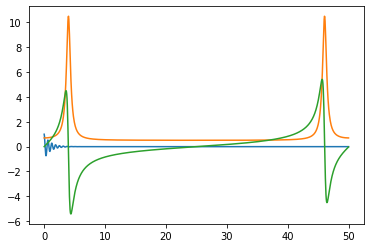

In [68]:
def f(t):
    return np.exp(-t)*np.cos(10*t)

plt.plot(t,f(t),label='f(t)')
plt.plot(t,np.real(np.fft.fft(f(t))),label='RE DFT von f(t)')
plt.plot(t,np.imag(np.fft.fft(f(t))),label='IM DFT von f(t)')